In [ ]:
#Importing Libraries for Data Pre-processing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [ ]:
#Testing if GPU is Active
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
#Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Loading Stock Data**

In [ ]:
# Read the CSV file into a Pandas DataFrame
database = pd.read_csv('/content/drive/MyDrive/psxdata/stocks/UBL.csv')

# Extract the date and closing price columns
dates = database['ds']
closing_prices = database['y']

# Calculate the number of data points for training and testing
number_of_data_points = len(database)
train_data_size = math.ceil(number_of_data_points * 0.8)

# Split the data into training and testing sets
train_data = pd.DataFrame(data={'Date': dates[:train_data_size], 'Close': closing_prices[:train_data_size]})
test_data = pd.DataFrame(data={'Date': dates[train_data_size:], 'Close': closing_prices[train_data_size:]})

# Print the first few rows of the training and testing data
print('Training data:')
print(train_data.head())
print(train_data.shape)

print('\nTesting data:')
print(test_data.head())
print(test_data.shape)


Training data:
         Date  Close
0  2013/01/01  83.24
1  2013/01/02  81.24
2  2013/01/03  81.81
3  2013/01/04  82.52
4  2013/01/07  82.69
(1983, 2)

Testing data:
            Date   Close
1983  2021/01/01  129.95
1984  2021/01/04  130.14
1985  2021/01/05  130.16
1986  2021/01/06  131.48
1987  2021/01/07  139.32
(495, 2)


# **Data Pre-Processing**

In [ ]:
# Selecting Open Price values for Training Data
print("OG Dataset_train, 1 Dimensional:", dataset_train.shape)

# Reshaping 1D to 2D array for Training Data
dataset_train = np.reshape(dataset_train, (-1,1))
print("New Dataset_train, 2 Dimensional:", dataset_train.shape)


# Selecting Open Price values for Testing Data
dataset_test = test_data.Close.values
print("OG Dataset_test 1 Dimensional:", dataset_test.shape)

# Reshaping 1D to 2D array for Testing Data
dataset_test = np.reshape(dataset_test, (-1,1))
print("New Dataset_test 2 Dimensional:", dataset_test.shape)

OG Dataset_train, 1 Dimensional: (1983, 1)
New Dataset_train, 2 Dimensional: (1983, 1)
OG Dataset_test 1 Dimensional: (495,)
New Dataset_test 2 Dimensional: (495, 1)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
# scaling both datasets, Normalizing values between 0 and 1
scaled_train = scaler.fit_transform(dataset_train)
scaled_test = scaler.fit_transform(dataset_test)

print("Training Dataset Normalized")
print(scaled_train[:5])
print("Normalized Training Dataset Shape:", scaled_train.shape)

print("Testing Dataset Normalized")
print(scaled_test[:5])
print("Normalized Testing Dataset Shape:", scaled_test.shape)

Training Dataset Normalized
[[0.01030184]
 [0.        ]
 [0.00293603]
 [0.00659318]
 [0.00746884]]
Normalized Training Dataset Shape: (1983, 1)
Testing Dataset Normalized
[[0.62055789]
 [0.624188  ]
 [0.62457012]
 [0.64978984]
 [0.79957967]]
Normalized Testing Dataset Shape: (495, 1)


In [ ]:
#Only to understand the below code of x_train and y_train datasets
test = []
for i in range(1, 101):
  test.append(i)
print(test)

test = np.array(test)
test = np.reshape(test, (-1, 1))
print(type(test))
print("The shape is:", test.shape)

#For training set
xs = []
ys = []
for i in range(5, len(test)):
    xs.append(test[i-5:i, 0])
    ys.append(test[i, 0])
    if i >= 99:
        print("XS Array is:", xs)
        print("YS Array is:", ys)

xs = np.array(xs)
ys = np.array(ys)


print("XS Shape is:", xs.shape)
print("YS Shape is:", ys.shape)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
<class 'numpy.ndarray'>
The shape is: (100, 1)
XS Array is: [array([1, 2, 3, 4, 5]), array([2, 3, 4, 5, 6]), array([3, 4, 5, 6, 7]), array([4, 5, 6, 7, 8]), array([5, 6, 7, 8, 9]), array([ 6,  7,  8,  9, 10]), array([ 7,  8,  9, 10, 11]), array([ 8,  9, 10, 11, 12]), array([ 9, 10, 11, 12, 13]), array([10, 11, 12, 13, 14]), array([11, 12, 13, 14, 15]), array([12, 13, 14, 15, 16]), array([13, 14, 15, 16, 17]), array([14, 15, 16, 17, 18]), array([15, 16, 17, 18, 19]), array([16, 17, 18, 19, 20]), array([17, 18, 19, 20, 21]), array([18, 19, 20, 21, 22]), array([19, 20, 21, 22, 23]), array([20, 21, 22, 2

In [ ]:
#For training set
X_train = []
y_train = []
print("Training set")
for i in range(50, len(scaled_train)):
    X_train.append(scaled_train[i-50:i, 0])
    y_train.append(scaled_train[i, 0])
    if i <= 51:
        print(X_train)
        print(y_train)
        print()

#For testing set
X_test = []
y_test = []
print("Testing set")
for i in range(50, len(scaled_test)):
    X_test.append(scaled_test[i-50:i, 0])
    y_test.append(scaled_test[i, 0])
    if i <= 51:
        print(X_test)
        print(y_test)
        print()

Training set
[array([0.01030184, 0.        , 0.00293603, 0.00659318, 0.00746884,
       0.01437107, 0.02359122, 0.01704955, 0.02364273, 0.02287009,
       0.00772638, 0.01164108, 0.01468013, 0.01977954, 0.02209746,
       0.02972082, 0.03693211, 0.03425363, 0.04228907, 0.0435768 ,
       0.04234058, 0.04790357, 0.05480581, 0.05918409, 0.05635109,
       0.05336355, 0.05398166, 0.05578449, 0.06072937, 0.06551973,
       0.0608839 , 0.06196559, 0.06438653, 0.05717523, 0.06675595,
       0.06273823, 0.06861028, 0.05073658, 0.04532811, 0.06016277,
       0.06217163, 0.06119295, 0.06011126, 0.05676316, 0.05851447,
       0.05243639, 0.0301844 , 0.0245699 , 0.03718966, 0.03667456])]
[0.03981662717626455]

[array([0.01030184, 0.        , 0.00293603, 0.00659318, 0.00746884,
       0.01437107, 0.02359122, 0.01704955, 0.02364273, 0.02287009,
       0.00772638, 0.01164108, 0.01468013, 0.01977954, 0.02209746,
       0.02972082, 0.03693211, 0.03425363, 0.04228907, 0.0435768 ,
       0.04234058, 0.0

In [ ]:
# The data is converted to Numpy array
#For training set
X_train, y_train = np.array(X_train), np.array(y_train)
#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))
print("X_train:" , X_train.shape , "y_train:" , y_train.shape)


#For testing set
X_test, y_test = np.array(X_test), np.array(y_test)
#Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))
print("X_test:", X_test.shape , "y_test:", y_test.shape)

X_train: (1933, 50, 1) y_train: (1933, 1)
X_test: (445, 50, 1) y_test: (445, 1)


# **Making the Model**

In [ ]:
# importing libraries for model
from keras.models import Sequential
#from keras.layers import LSTM
from keras.layers import Dense
#from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import GRU, Bidirectional
from tensorflow.keras.optimizers import SGD
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [ ]:
#Initialising the GRU model
regressorGRU = Sequential()


# 1 GRU layers with Dropout regularisation
regressorGRU.add(GRU(units=50,
                     input_shape=(X_train.shape[1],1),
                     activation='tanh'))
regressorGRU.add(Dropout(0.2))

# 4 Stacked GRU layers with Dropout regularisation
#regressorGRU.add(GRU(units=50,
#                     return_sequences=True,
#                     input_shape=(X_train.shape[1],1),
#                     activation='tanh'))
#regressorGRU.add(Dropout(0.2))
#
#regressorGRU.add(GRU(units=50,
#                     return_sequences=True,
#                     activation='tanh'))
#
#regressorGRU.add(GRU(units=50,
#                     return_sequences=True,
#                     activation='tanh'))
#
#regressorGRU.add(GRU(units=50,
#                     activation='tanh'))

# The output layer
regressorGRU.add(Dense(units=1, activation='relu'))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(learning_rate=0.01,
                                   momentum=0.9,
                                   nesterov=False),
                     loss='mean_squared_error')

# Fitting the data
regressorGRU.fit(X_train,y_train,epochs=5,batch_size=1)
regressorGRU.summary()

Epoch 1/5
1933/1933 [==============================] - 10s 5ms/step - loss: 0.0050
Epoch 2/5
1933/1933 [==============================] - 8s 4ms/step - loss: 0.0032
Epoch 3/5
1933/1933 [==============================] - 9s 5ms/step - loss: 0.0031
Epoch 4/5
1933/1933 [==============================] - 9s 4ms/step - loss: 0.0030
Epoch 5/5
1933/1933 [==============================] - 9s 4ms/step - loss: 0.0027
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 5)                 120       
                                                                 
 dropout_2 (Dropout)         (None, 5)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 126 (504.00 Byte)
Trainab

In [ ]:
# predictions with X_test data
y_GRU = regressorGRU.predict(X_test)

14/14 [==============================] - 0s 2ms/step


In [ ]:
# scaling back from 0-1 to original, Un-Normalize the values
y_GRU_O = scaler.inverse_transform(y_GRU)
y_test_O = scaler.inverse_transform(y_test)

# **Visualizing & Graphs**

In [ ]:
print("Test Data Shape:", test_data.shape)
print("Predicted Data Shape:", y_GRU_O.shape)
print("y_test Data Shape:", y_test_O.shape)

Test Data Shape: (495, 2)
Predicted Data Shape: (445, 1)
y_test Data Shape: (445, 1)


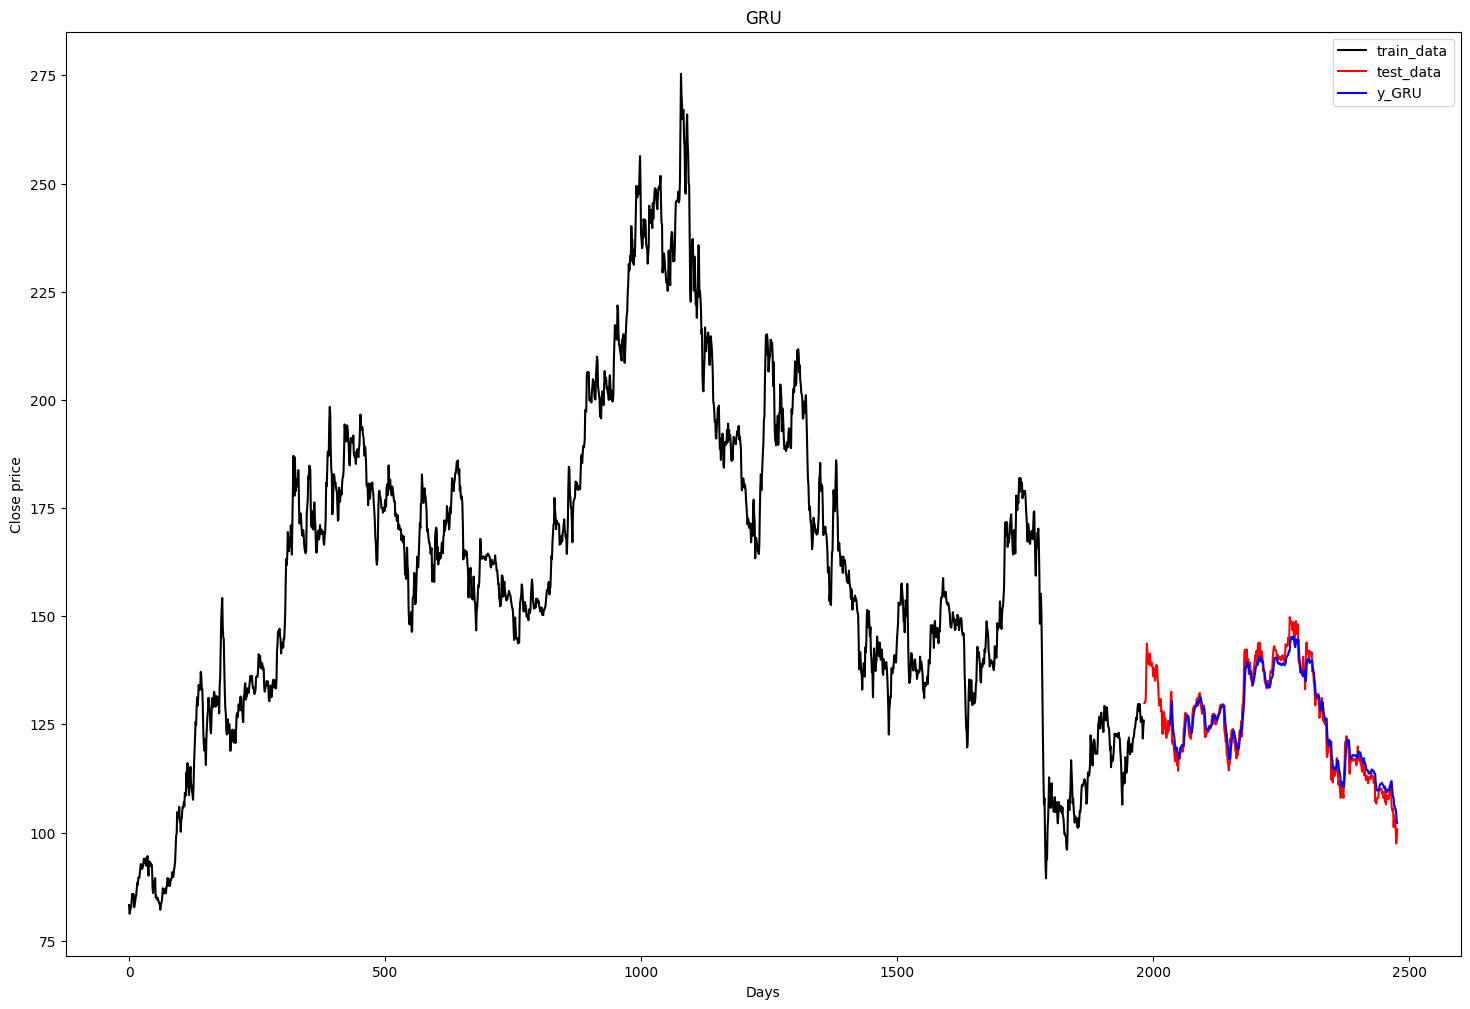

In [ ]:
fig, ax = plt.subplots(figsize=(18, 12))

# Plot for GRU predictions
ax.plot(train_data.index, train_data.Close, label="train_data", color="black")
ax.plot(test_data.index, test_data.Close, label="test_data", color="red")
ax.plot(test_data.index[50:], y_GRU_O, label="y_GRU", color="blue")
ax.legend()
ax.title.set_text("GRU")

plt.xlabel("Days")
plt.ylabel("Close price")

plt.show()

# **Evaluation**

In [ ]:
# calculate mean squared error
mse = mean_squared_error(y_test_O, y_GRU_O)
print('Mean Squared Error (MSE):', mse)

# calculate mean absolute error
mae = metrics.mean_absolute_error(y_test_O, y_GRU_O)
print('Mean Absolute Error (MAE):', mae)

# calculate root mean squared error
rmse = math.sqrt(mse)
print('Root Mean Squared Error (RMSE):', rmse)

Mean Squared Error (MSE): 6.654207310221241
Mean Absolute Error (MAE): 2.0065306225037305
Root Mean Squared Error (RMSE): 2.5795750251196883


# **Mass Deploy Version**

Epoch 1/20
1933/1933 [==============================] - 15s 7ms/step - loss: 0.0026
Epoch 2/20
1933/1933 [==============================] - 8s 4ms/step - loss: 9.8151e-04
Epoch 3/20
1933/1933 [==============================] - 8s 4ms/step - loss: 8.9373e-04
Epoch 4/20
1933/1933 [==============================] - 9s 5ms/step - loss: 8.3005e-04
Epoch 5/20
1933/1933 [==============================] - 8s 4ms/step - loss: 7.6294e-04
Epoch 6/20
1933/1933 [==============================] - 9s 5ms/step - loss: 7.1466e-04
Epoch 7/20
1933/1933 [==============================] - 8s 4ms/step - loss: 6.6101e-04
Epoch 8/20
1933/1933 [==============================] - 11s 5ms/step - loss: 6.9185e-04
Epoch 9/20
1933/1933 [==============================] - 9s 5ms/step - loss: 6.8370e-04
Epoch 10/20
1933/1933 [==============================] - 8s 4ms/step - loss: 6.0822e-04
Epoch 11/20
1933/1933 [==============================] - 9s 4ms/step - loss: 6.2358e-04
Epoch 12/20
1933/1933 [====================

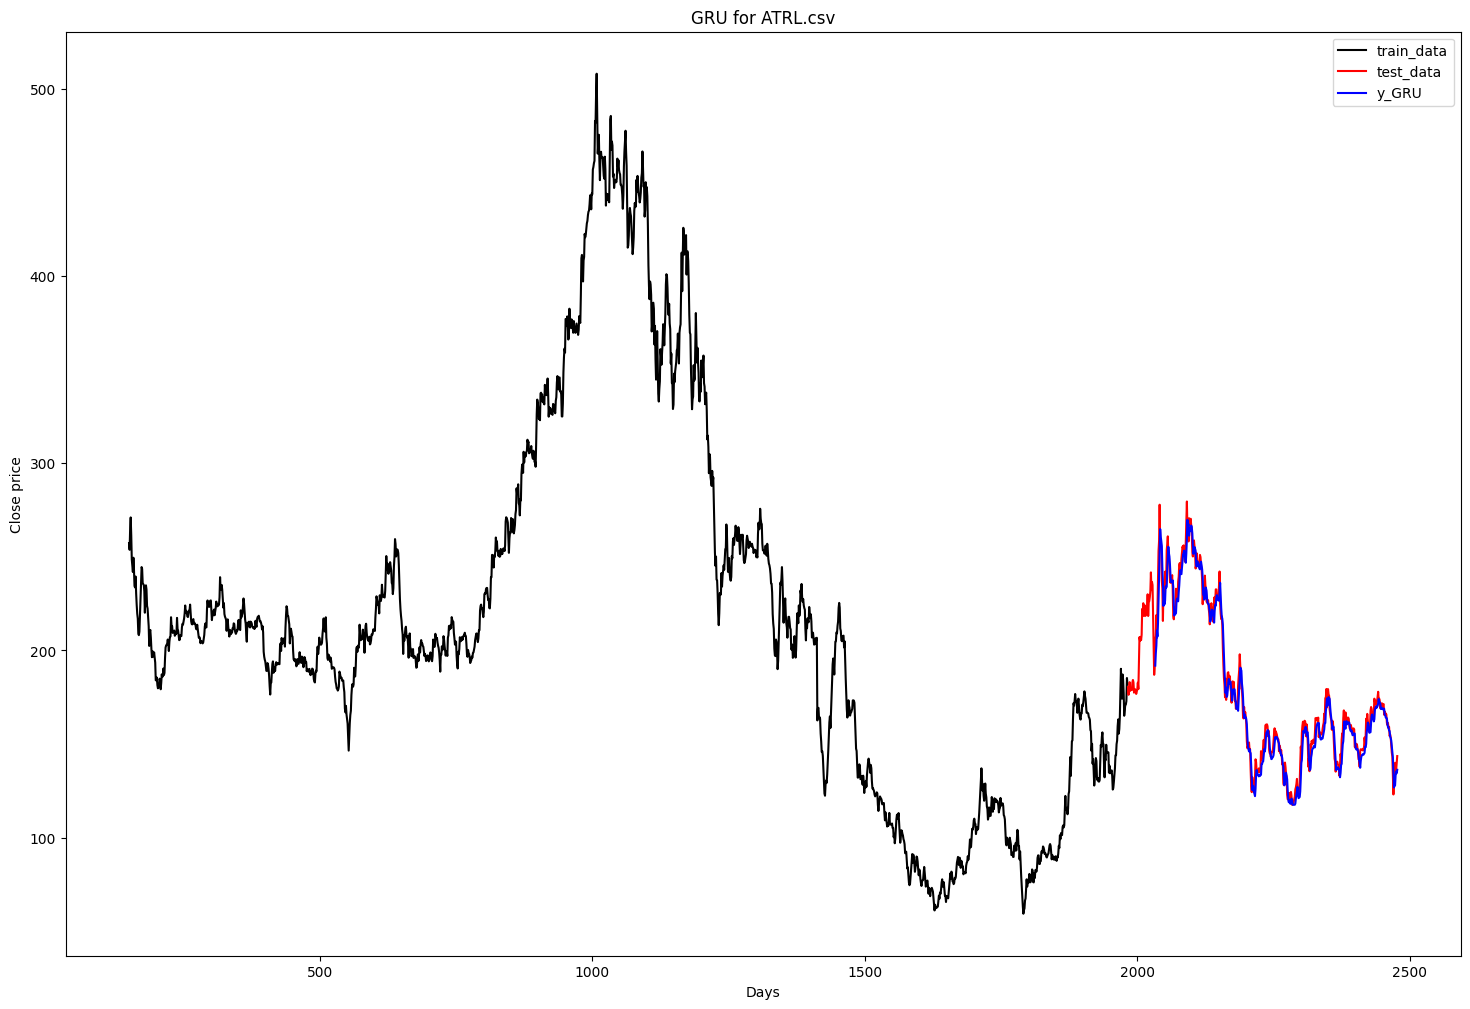

Epoch 1/20
1933/1933 [==============================] - 10s 4ms/step - loss: 0.0049
Epoch 2/20
1933/1933 [==============================] - 8s 4ms/step - loss: 0.0011
Epoch 3/20
1933/1933 [==============================] - 9s 5ms/step - loss: 9.4365e-04
Epoch 4/20
1933/1933 [==============================] - 8s 4ms/step - loss: 8.7555e-04
Epoch 5/20
1933/1933 [==============================] - 9s 5ms/step - loss: 8.3061e-04
Epoch 6/20
1933/1933 [==============================] - 8s 4ms/step - loss: 7.9985e-04
Epoch 7/20
1933/1933 [==============================] - 9s 4ms/step - loss: 7.6389e-04
Epoch 8/20
1933/1933 [==============================] - 9s 5ms/step - loss: 7.5602e-04
Epoch 9/20
1933/1933 [==============================] - 8s 4ms/step - loss: 8.0802e-04
Epoch 10/20
1933/1933 [==============================] - 9s 5ms/step - loss: 7.6249e-04
Epoch 11/20
1933/1933 [==============================] - 8s 4ms/step - loss: 6.9202e-04
Epoch 12/20
1933/1933 [=========================

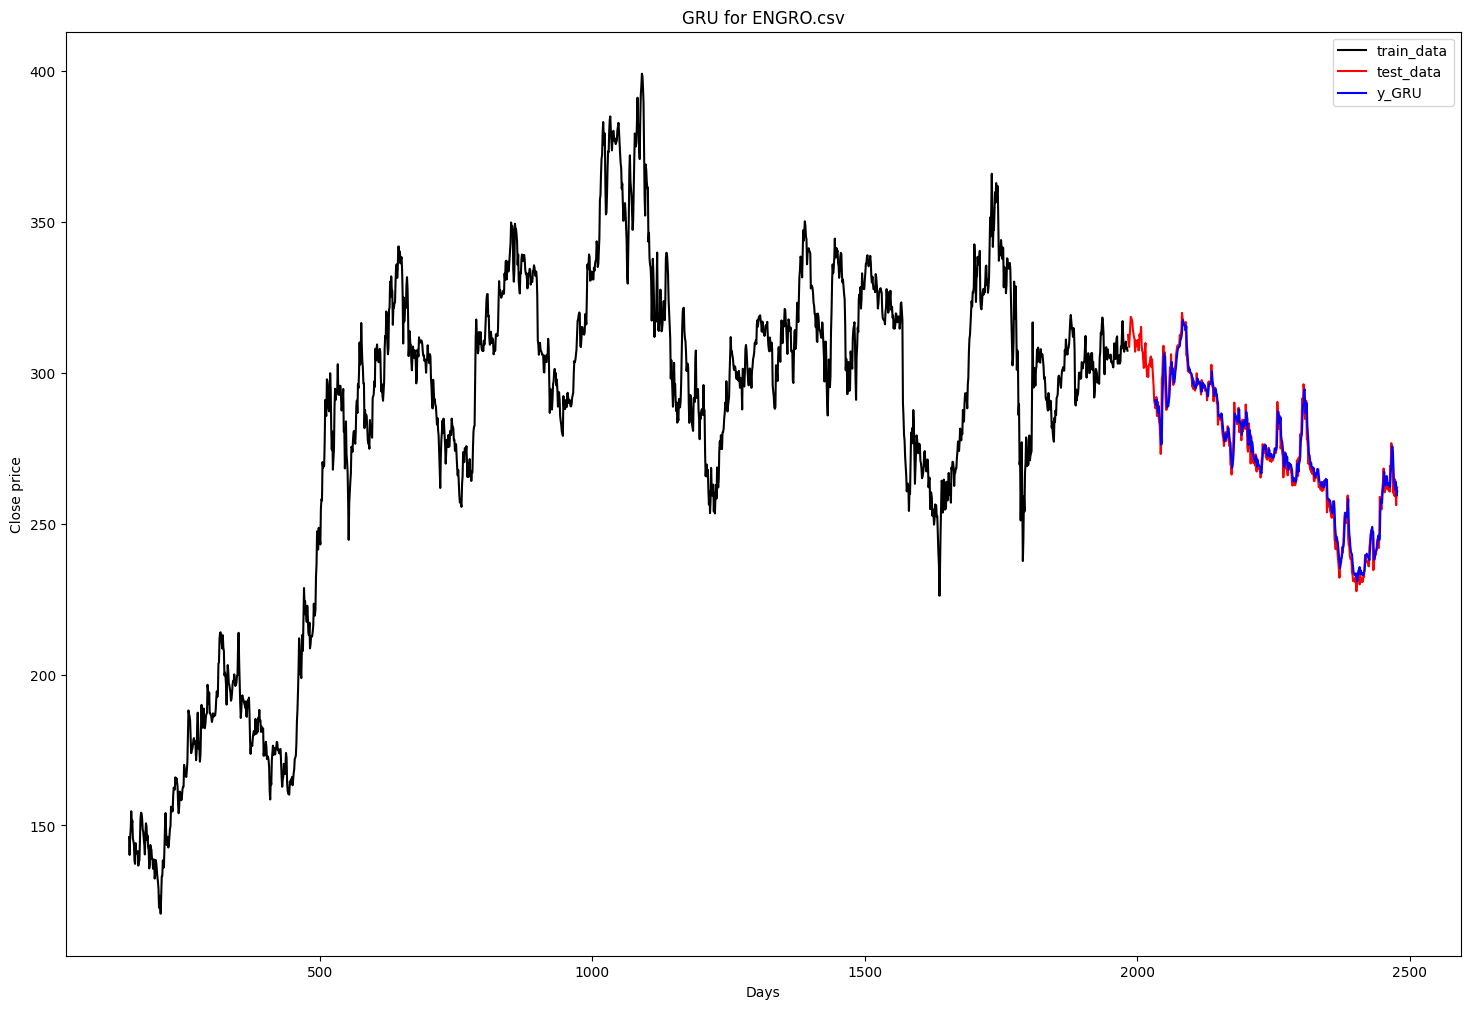

Epoch 1/20
1933/1933 [==============================] - 10s 4ms/step - loss: 0.0040
Epoch 2/20
1933/1933 [==============================] - 9s 4ms/step - loss: 0.0010
Epoch 3/20
1933/1933 [==============================] - 9s 5ms/step - loss: 9.6070e-04
Epoch 4/20
1933/1933 [==============================] - 8s 4ms/step - loss: 8.8932e-04
Epoch 5/20
1933/1933 [==============================] - 9s 5ms/step - loss: 7.9242e-04
Epoch 6/20
1933/1933 [==============================] - 8s 4ms/step - loss: 8.1578e-04
Epoch 7/20
1933/1933 [==============================] - 9s 4ms/step - loss: 6.8013e-04
Epoch 8/20
1933/1933 [==============================] - 9s 5ms/step - loss: 7.3307e-04
Epoch 9/20
1933/1933 [==============================] - 8s 4ms/step - loss: 6.7701e-04
Epoch 10/20
1933/1933 [==============================] - 9s 5ms/step - loss: 7.4170e-04
Epoch 11/20
1933/1933 [==============================] - 8s 4ms/step - loss: 6.9180e-04
Epoch 12/20
1933/1933 [=========================

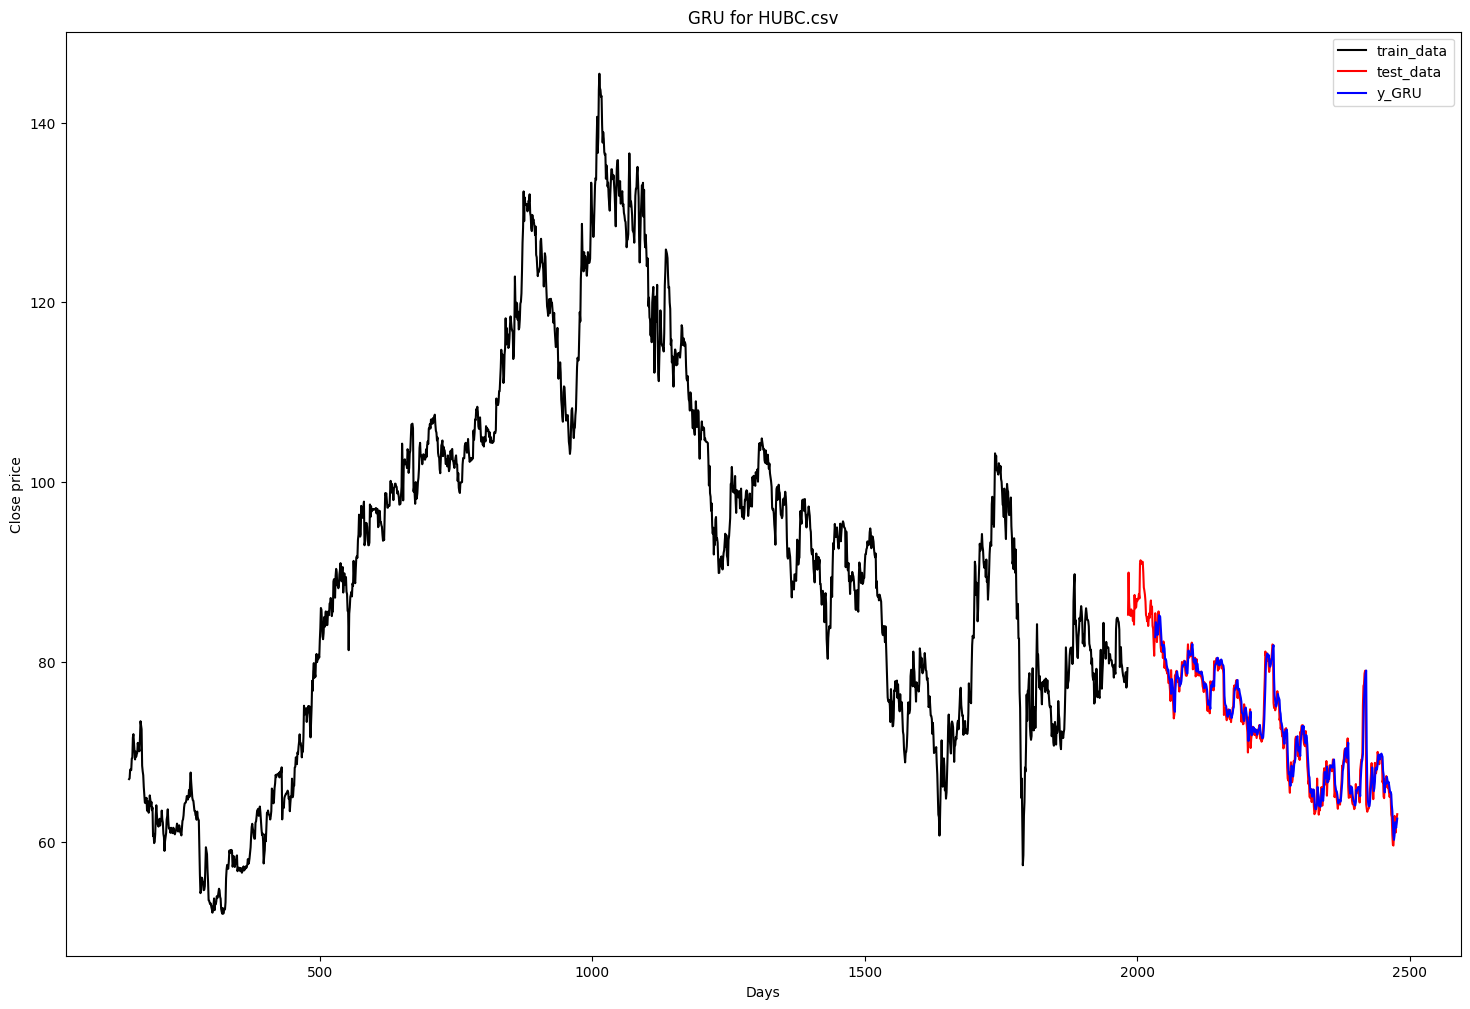

Epoch 1/20
1933/1933 [==============================] - 10s 5ms/step - loss: 0.0041
Epoch 2/20
1933/1933 [==============================] - 9s 4ms/step - loss: 0.0012
Epoch 3/20
1933/1933 [==============================] - 9s 5ms/step - loss: 0.0010
Epoch 4/20
1933/1933 [==============================] - 9s 5ms/step - loss: 9.6060e-04
Epoch 5/20
1933/1933 [==============================] - 9s 5ms/step - loss: 9.3067e-04
Epoch 6/20
1933/1933 [==============================] - 9s 5ms/step - loss: 9.1754e-04
Epoch 7/20
1933/1933 [==============================] - 8s 4ms/step - loss: 8.6141e-04
Epoch 8/20
1933/1933 [==============================] - 9s 5ms/step - loss: 8.6908e-04
Epoch 9/20
1933/1933 [==============================] - 8s 4ms/step - loss: 7.9296e-04
Epoch 10/20
1933/1933 [==============================] - 9s 5ms/step - loss: 8.4868e-04
Epoch 11/20
1933/1933 [==============================] - 9s 5ms/step - loss: 8.1759e-04
Epoch 12/20
1933/1933 [=============================

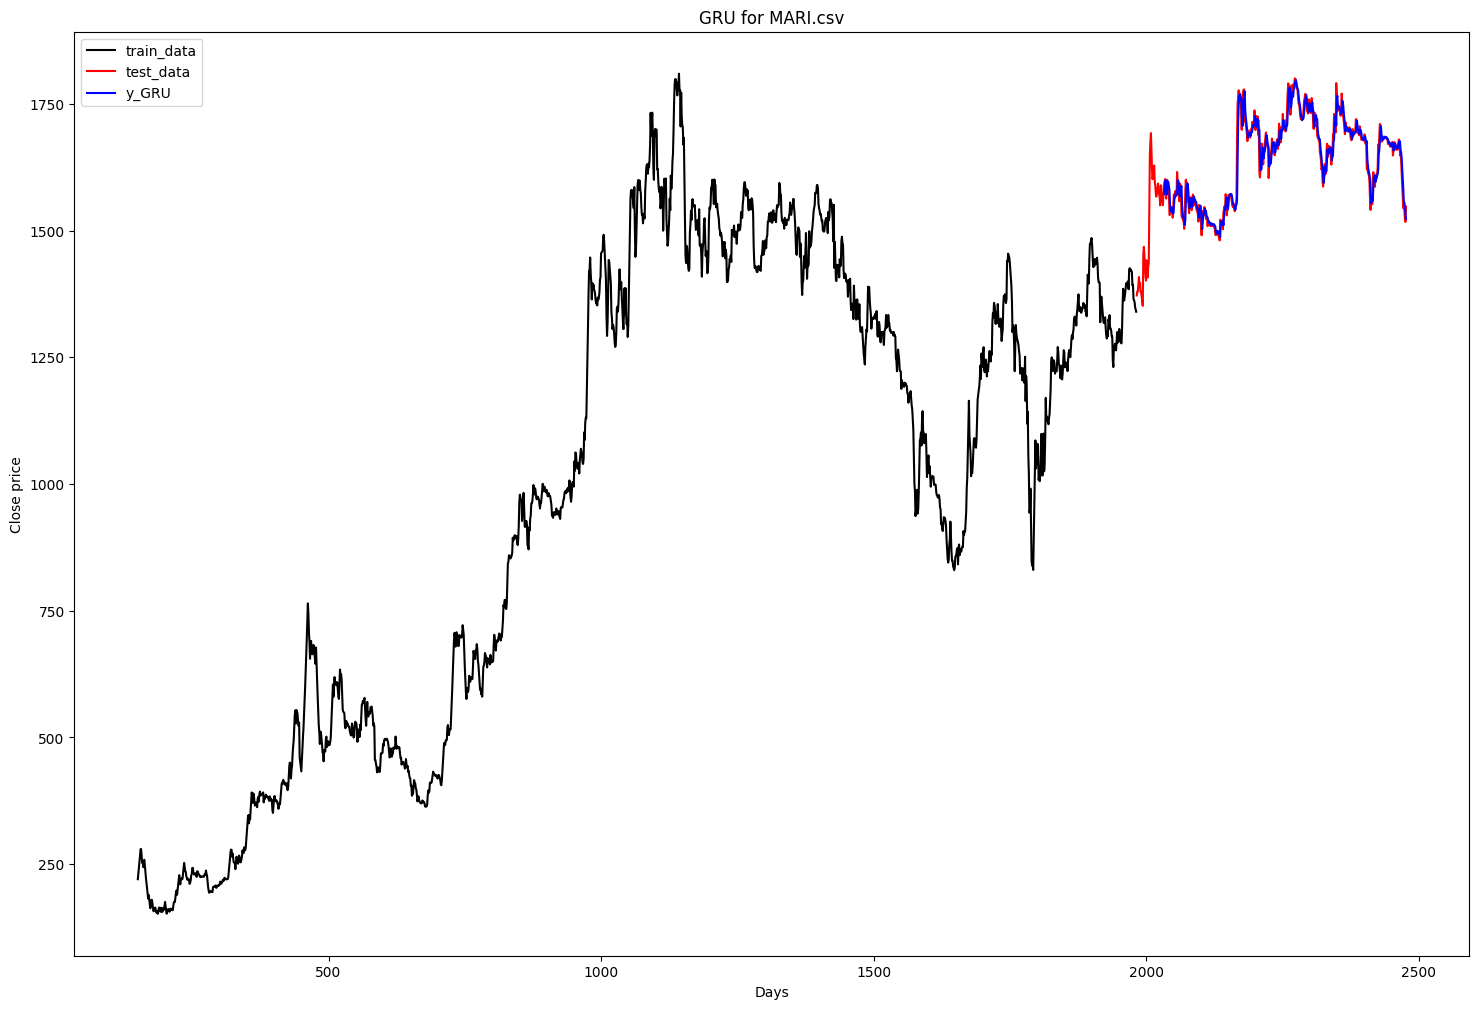

Epoch 1/20
1933/1933 [==============================] - 10s 5ms/step - loss: 0.0029
Epoch 2/20
1933/1933 [==============================] - 8s 4ms/step - loss: 0.0013
Epoch 3/20
1933/1933 [==============================] - 9s 5ms/step - loss: 0.0011
Epoch 4/20
1933/1933 [==============================] - 8s 4ms/step - loss: 9.6942e-04
Epoch 5/20
1933/1933 [==============================] - 9s 5ms/step - loss: 8.9553e-04
Epoch 6/20
1933/1933 [==============================] - 9s 5ms/step - loss: 9.4141e-04
Epoch 7/20
1933/1933 [==============================] - 9s 4ms/step - loss: 8.8660e-04
Epoch 8/20
1933/1933 [==============================] - 9s 5ms/step - loss: 8.2642e-04
Epoch 9/20
1933/1933 [==============================] - 9s 5ms/step - loss: 9.1726e-04
Epoch 10/20
1933/1933 [==============================] - 9s 5ms/step - loss: 8.1722e-04
Epoch 11/20
1933/1933 [==============================] - 9s 5ms/step - loss: 8.4431e-04
Epoch 12/20
1933/1933 [=============================

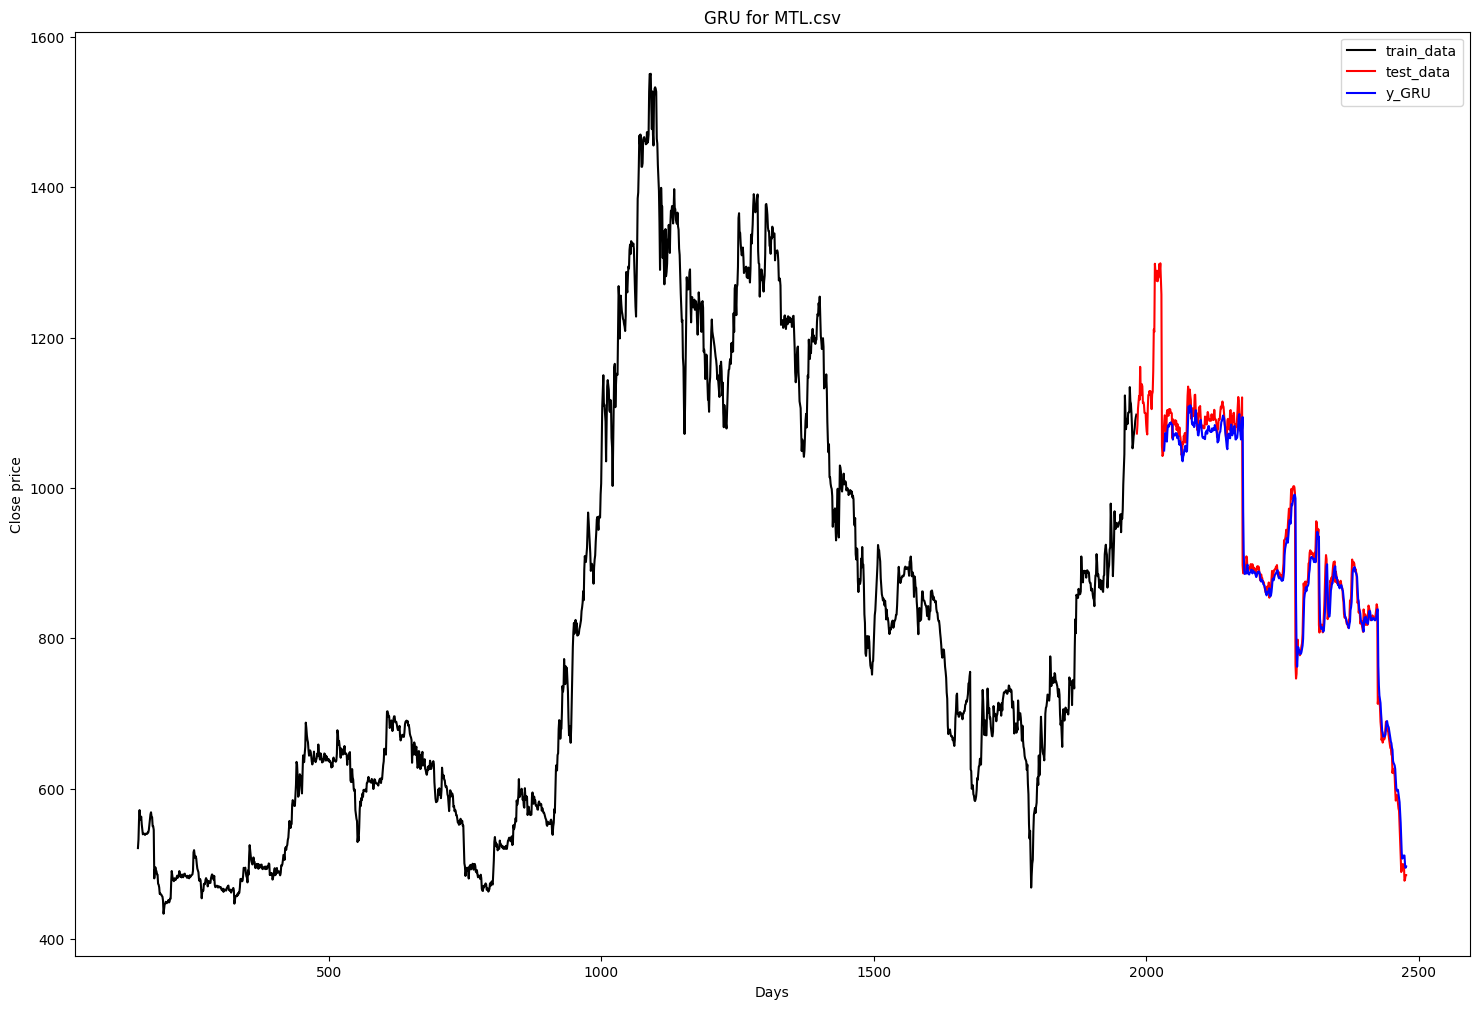

Epoch 1/20
1933/1933 [==============================] - 11s 5ms/step - loss: 0.0039
Epoch 2/20
1933/1933 [==============================] - 8s 4ms/step - loss: 0.0011
Epoch 3/20
1933/1933 [==============================] - 9s 5ms/step - loss: 8.8741e-04
Epoch 4/20
1933/1933 [==============================] - 8s 4ms/step - loss: 8.7923e-04
Epoch 5/20
1933/1933 [==============================] - 9s 5ms/step - loss: 7.9590e-04
Epoch 6/20
1933/1933 [==============================] - 9s 5ms/step - loss: 7.6666e-04
Epoch 7/20
1933/1933 [==============================] - 9s 4ms/step - loss: 7.3922e-04
Epoch 8/20
1933/1933 [==============================] - 9s 5ms/step - loss: 7.5944e-04
Epoch 9/20
1933/1933 [==============================] - 8s 4ms/step - loss: 7.4442e-04
Epoch 10/20
1933/1933 [==============================] - 9s 5ms/step - loss: 7.5470e-04
Epoch 11/20
1933/1933 [==============================] - 9s 5ms/step - loss: 7.0397e-04
Epoch 12/20
1933/1933 [=========================

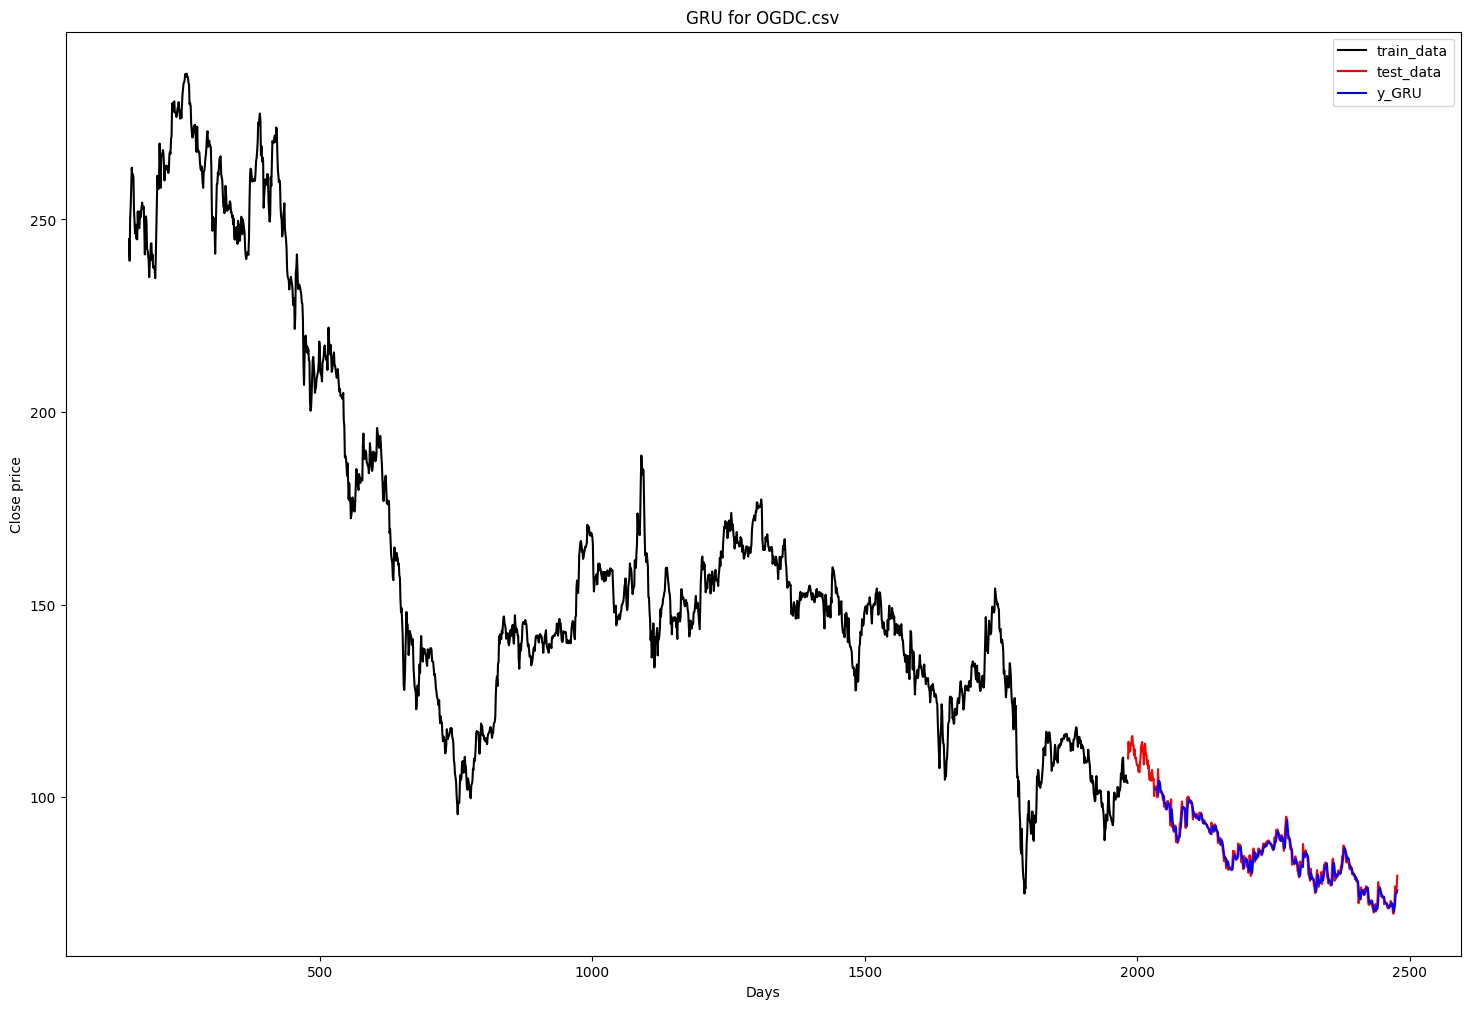

Epoch 1/20
1933/1933 [==============================] - 11s 5ms/step - loss: 0.0029
Epoch 2/20
1933/1933 [==============================] - 8s 4ms/step - loss: 0.0011
Epoch 3/20
1933/1933 [==============================] - 9s 5ms/step - loss: 9.7854e-04
Epoch 4/20
1933/1933 [==============================] - 8s 4ms/step - loss: 9.2045e-04
Epoch 5/20
1933/1933 [==============================] - 9s 5ms/step - loss: 8.7369e-04
Epoch 6/20
1933/1933 [==============================] - 9s 5ms/step - loss: 8.4866e-04
Epoch 7/20
1933/1933 [==============================] - 8s 4ms/step - loss: 7.9528e-04
Epoch 8/20
1933/1933 [==============================] - 9s 5ms/step - loss: 8.2816e-04
Epoch 9/20
1933/1933 [==============================] - 8s 4ms/step - loss: 7.9907e-04
Epoch 10/20
1933/1933 [==============================] - 9s 5ms/step - loss: 7.9652e-04
Epoch 11/20
1933/1933 [==============================] - 9s 5ms/step - loss: 7.6339e-04
Epoch 12/20
1933/1933 [=========================

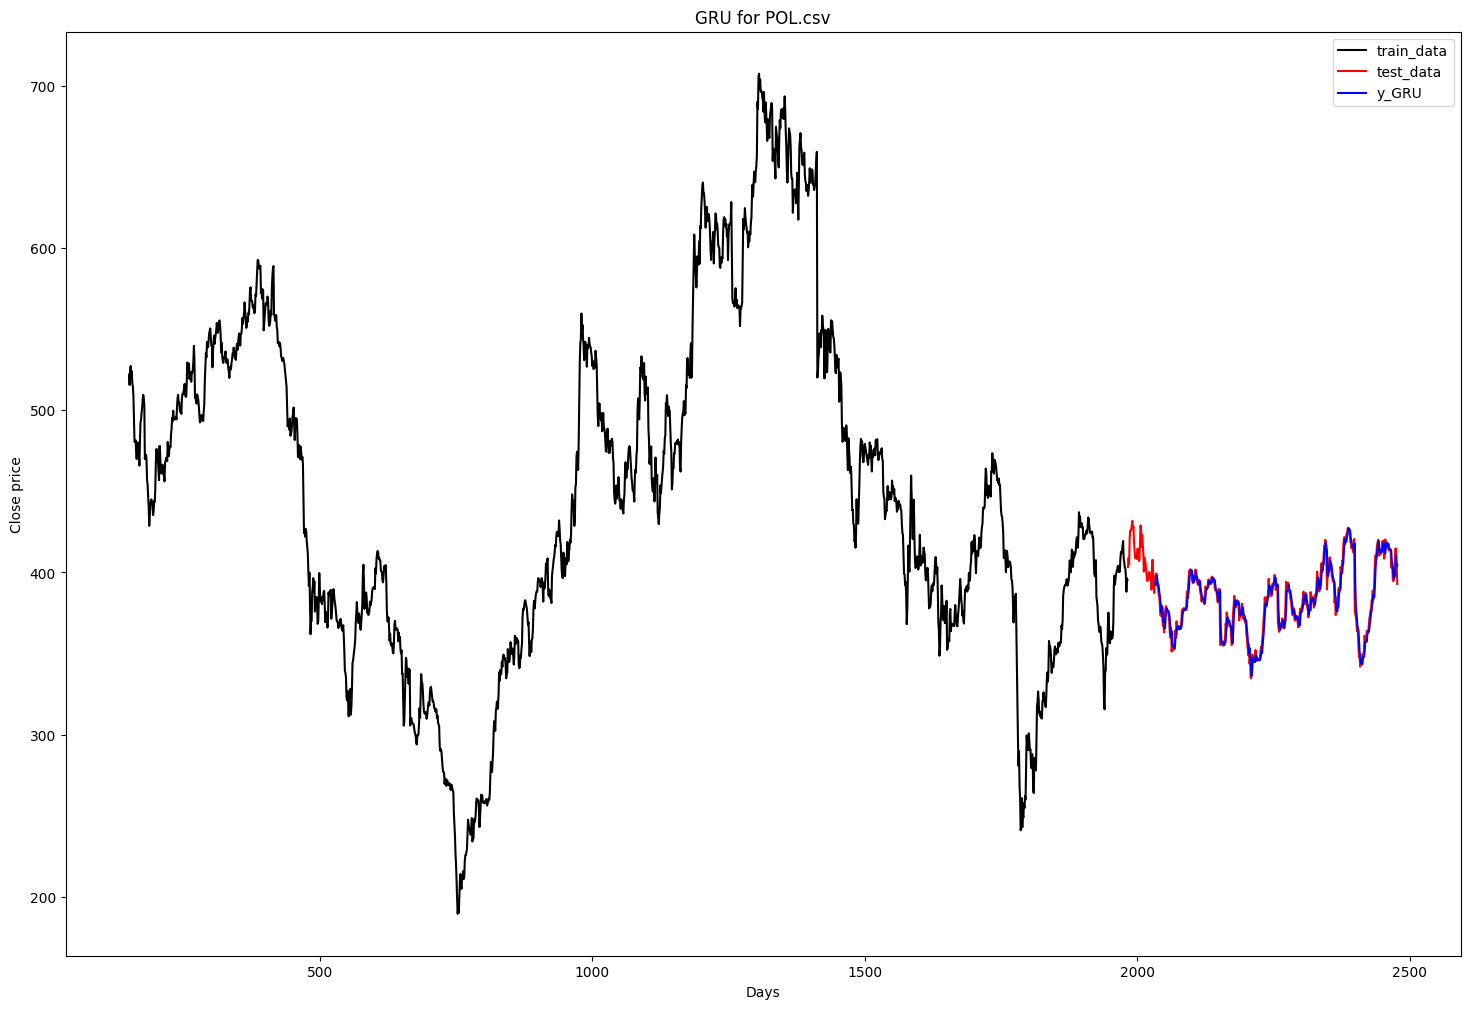

Epoch 1/20
1933/1933 [==============================] - 10s 4ms/step - loss: 0.0335
Epoch 2/20
1933/1933 [==============================] - 9s 5ms/step - loss: 0.0013
Epoch 3/20
1933/1933 [==============================] - 9s 5ms/step - loss: 0.0011
Epoch 4/20
1933/1933 [==============================] - 9s 5ms/step - loss: 0.0010
Epoch 5/20
1933/1933 [==============================] - 10s 5ms/step - loss: 0.0010
Epoch 6/20
1933/1933 [==============================] - 8s 4ms/step - loss: 8.9653e-04
Epoch 7/20
1933/1933 [==============================] - 9s 5ms/step - loss: 9.6425e-04
Epoch 8/20
1933/1933 [==============================] - 9s 5ms/step - loss: 8.7414e-04
Epoch 9/20
1933/1933 [==============================] - 10s 5ms/step - loss: 9.0029e-04
Epoch 10/20
1933/1933 [==============================] - 10s 5ms/step - loss: 8.2377e-04
Epoch 11/20
1933/1933 [==============================] - 8s 4ms/step - loss: 8.2064e-04
Epoch 12/20
1933/1933 [==============================] - 

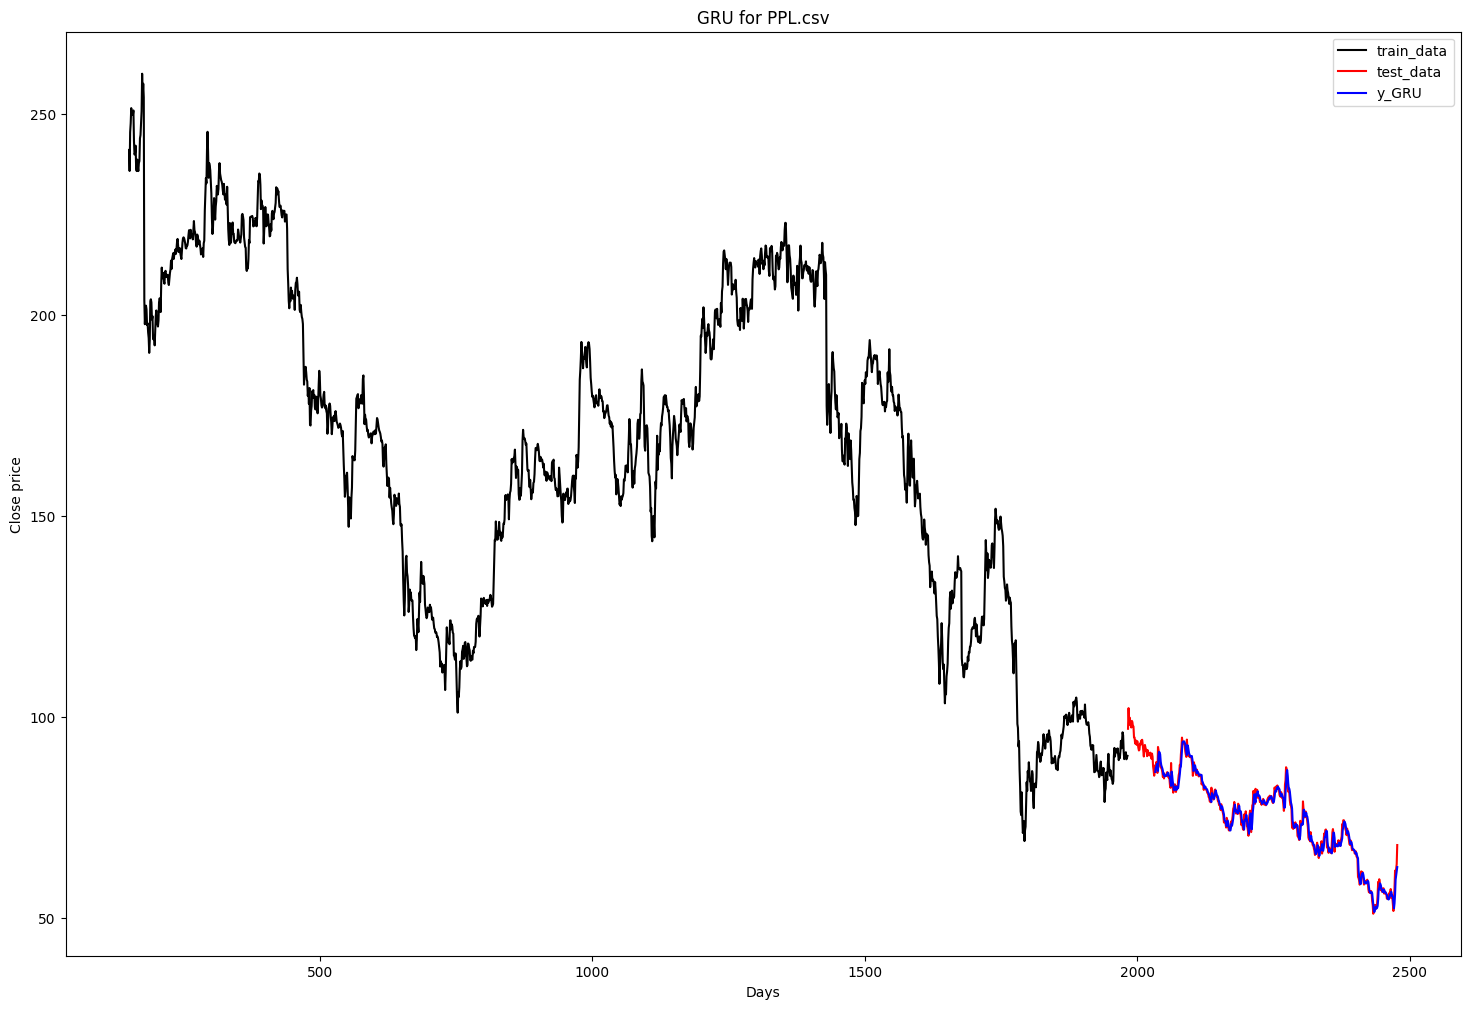

Epoch 1/20
1933/1933 [==============================] - 11s 5ms/step - loss: 0.0020
Epoch 2/20
1933/1933 [==============================] - 8s 4ms/step - loss: 9.2635e-04
Epoch 3/20
1933/1933 [==============================] - 9s 5ms/step - loss: 7.8389e-04
Epoch 4/20
1933/1933 [==============================] - 9s 4ms/step - loss: 7.0710e-04
Epoch 5/20
1933/1933 [==============================] - 9s 5ms/step - loss: 6.6233e-04
Epoch 6/20
1933/1933 [==============================] - 9s 5ms/step - loss: 6.3552e-04
Epoch 7/20
1933/1933 [==============================] - 8s 4ms/step - loss: 7.0015e-04
Epoch 8/20
1933/1933 [==============================] - 10s 5ms/step - loss: 6.2249e-04
Epoch 9/20
1933/1933 [==============================] - 9s 4ms/step - loss: 6.1025e-04
Epoch 10/20
1933/1933 [==============================] - 9s 5ms/step - loss: 5.5122e-04
Epoch 11/20
1933/1933 [==============================] - 9s 5ms/step - loss: 5.5459e-04
Epoch 12/20
1933/1933 [====================

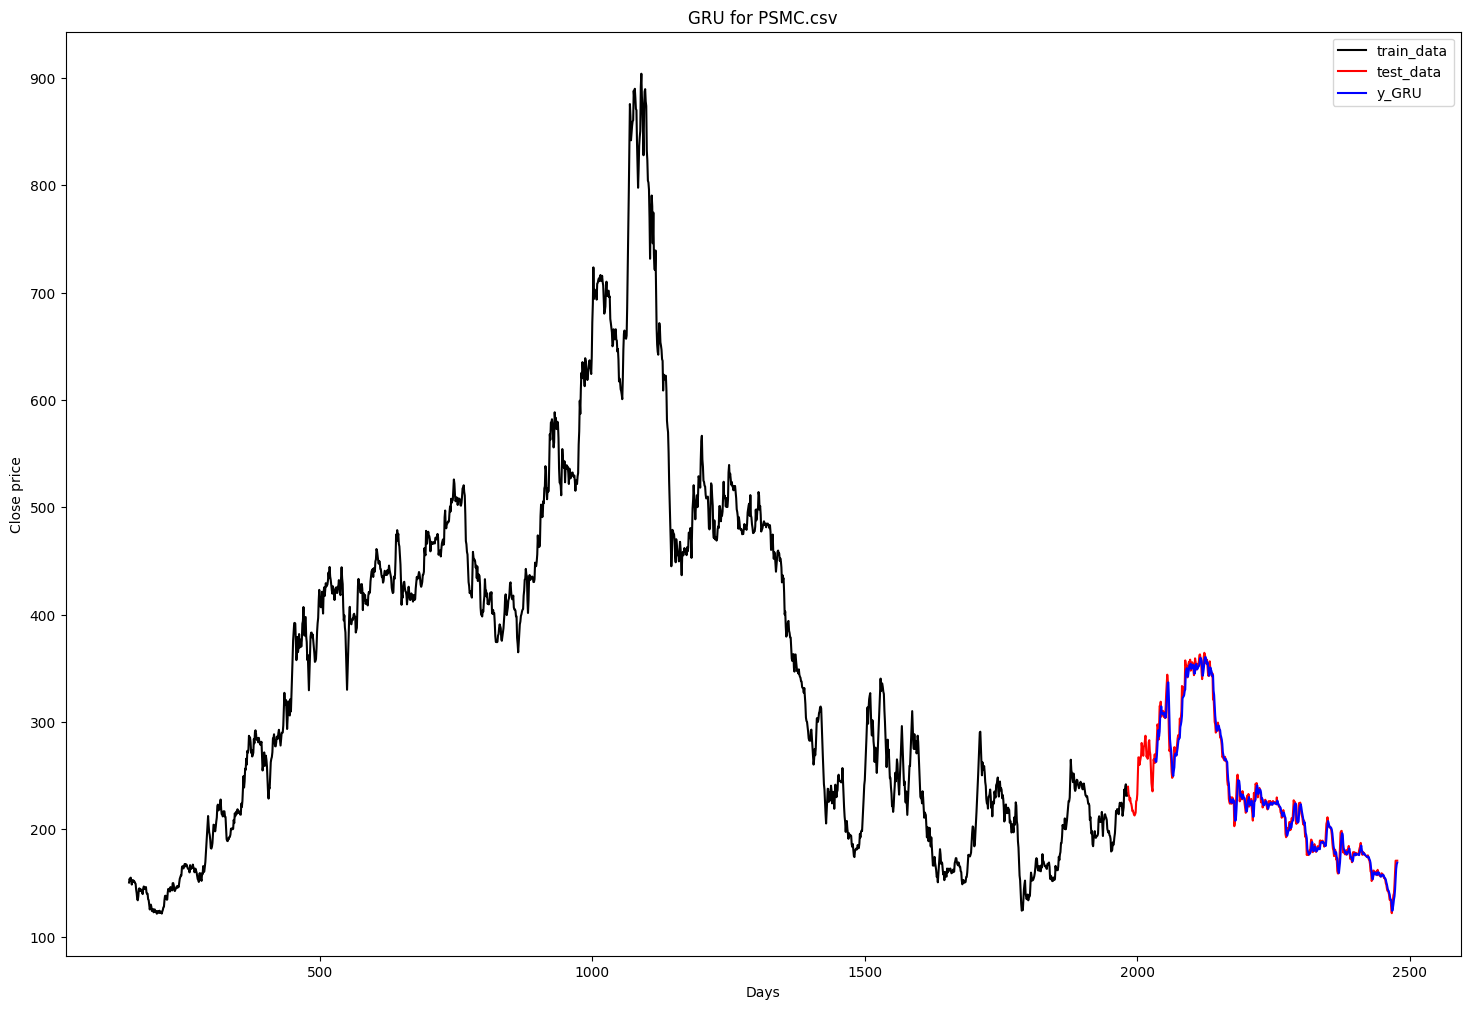

Epoch 1/20
1933/1933 [==============================] - 11s 5ms/step - loss: 0.0024
Epoch 2/20
1933/1933 [==============================] - 10s 5ms/step - loss: 0.0010
Epoch 3/20
1933/1933 [==============================] - 8s 4ms/step - loss: 9.0342e-04
Epoch 4/20
1933/1933 [==============================] - 10s 5ms/step - loss: 7.8294e-04
Epoch 5/20
1933/1933 [==============================] - 10s 5ms/step - loss: 8.2814e-04
Epoch 6/20
1933/1933 [==============================] - 9s 5ms/step - loss: 7.2903e-04
Epoch 7/20
1933/1933 [==============================] - 10s 5ms/step - loss: 7.3843e-04
Epoch 8/20
1933/1933 [==============================] - 9s 4ms/step - loss: 6.6136e-04
Epoch 9/20
1933/1933 [==============================] - 10s 5ms/step - loss: 7.1070e-04
Epoch 10/20
1933/1933 [==============================] - 9s 5ms/step - loss: 6.3513e-04
Epoch 11/20
1933/1933 [==============================] - 9s 5ms/step - loss: 6.4387e-04
Epoch 12/20
1933/1933 [====================

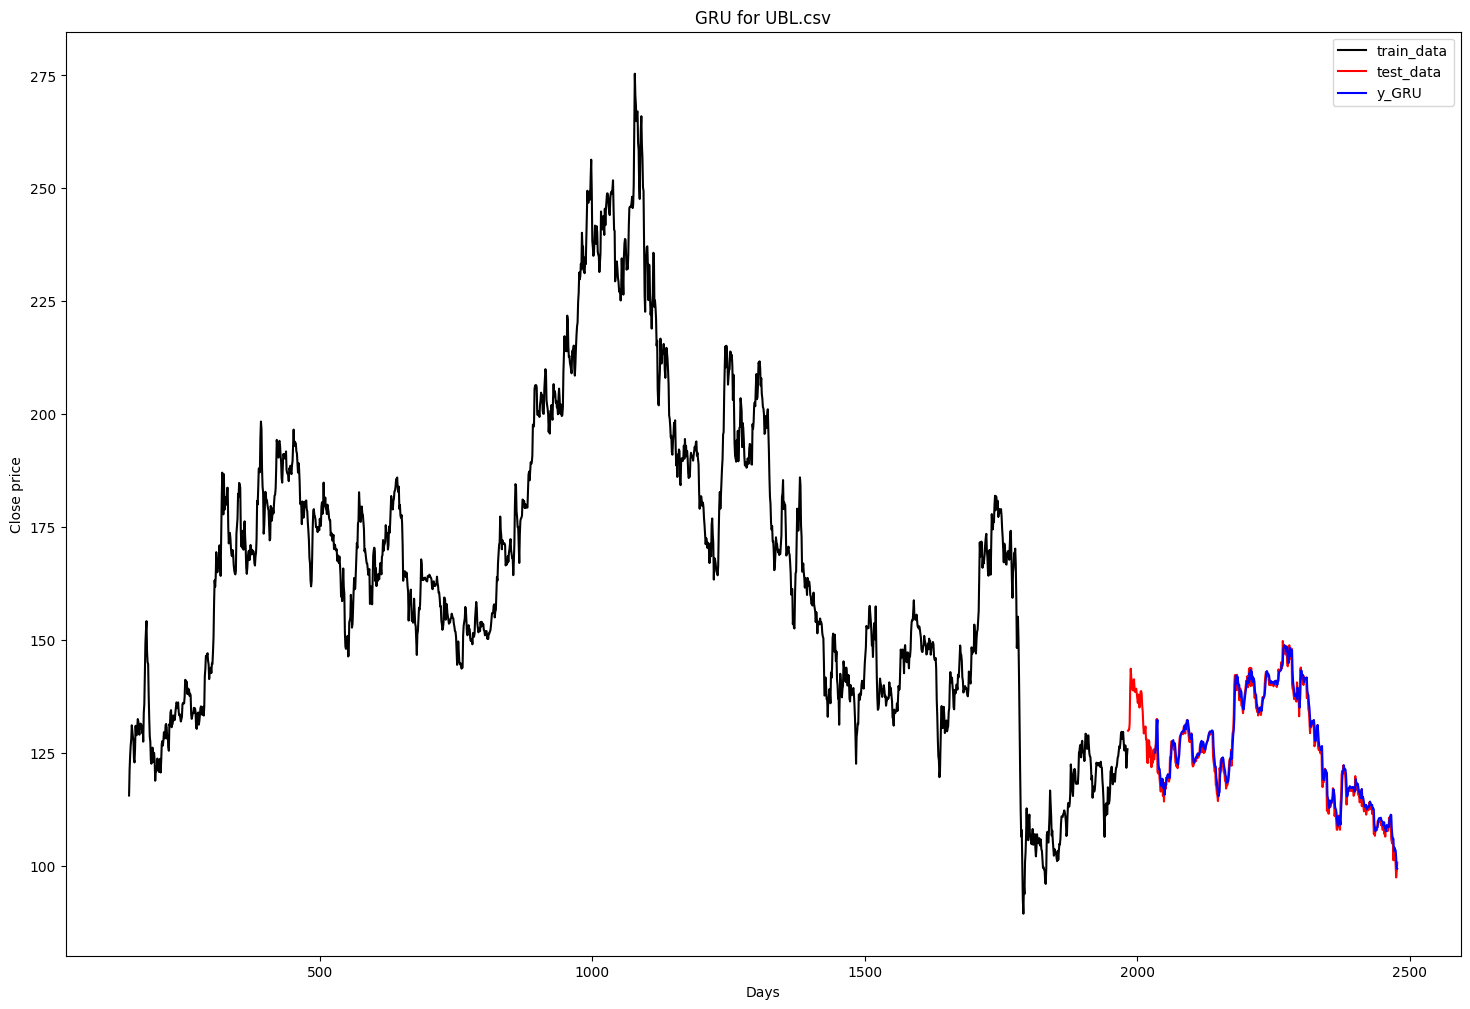

In [ ]:
# Mass Deploy script to generate outputs for all the stocks at once

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import tensorflow as tf
from google.colab import drive
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import GRU, Bidirectional
from tensorflow.keras.optimizers import SGD
from sklearn import metrics
from sklearn.metrics import mean_squared_error

#Mounting Google Drive
#drive.mount('/content/drive')

#Defining Stocks list
stocks = ["ATRL.csv", "ENGRO.csv", "HUBC.csv", "MARI.csv", "MTL.csv", "OGDC.csv", "POL.csv", "PPL.csv", "PSMC.csv", "UBL.csv"]

#Initializing empty lists for storing metrics
mae_list = []
mse_list = []
rmse_list = []

#Looping through each stock
for stock in stocks:
  # Loading Stock Data
  database = pd.read_csv('/content/drive/MyDrive/psxdata/stocks/' + stock)

  # Extracting date and closing price columns
  dates = database['ds']
  closing_prices = database['y']

  # Calculating number of data points for training and testing
  number_of_data_points = len(database)
  train_data_size = math.ceil(number_of_data_points * 0.8)

  # Splitting data into training and testing sets
  train_data = pd.DataFrame(data={'Date': dates[:train_data_size], 'Close': closing_prices[:train_data_size]})
  test_data = pd.DataFrame(data={'Date': dates[train_data_size:], 'Close': closing_prices[train_data_size:]})

  # Saving training and testing datasets as CSV files
  train_data.to_csv('/content/drive/MyDrive/psxdata/processed_data/train/train_' + stock)
  test_data.to_csv('/content/drive/MyDrive/psxdata/processed_data/test/test_' + stock)

  # Data Pre-Processing
  # Selecting Open Price values
  dataset_train = train_data.Close.values
  # Reshaping 1D to 2D array
  dataset_train = np.reshape(dataset_train, (-1,1))

  # Selecting Open Price values
  dataset_test = test_data.Close.values
  # Reshaping 1D to 2D array
  dataset_test = np.reshape(dataset_test, (-1,1))

  scaler = MinMaxScaler(feature_range=(0,1))
  # scaling both datasets, Normalizing values between 0 and 1
  scaled_train = scaler.fit_transform(dataset_train)
  scaled_test = scaler.fit_transform(dataset_test)

  #For training set
  X_train = []
  y_train = []
  for i in range(50, len(scaled_train)):
      X_train.append(scaled_train[i-50:i, 0])
      y_train.append(scaled_train[i, 0])

  #For testing set
  X_test = []
  y_test = []
  for i in range(50, len(scaled_test)):
      X_test.append(scaled_test[i-50:i, 0])
      y_test.append(scaled_test[i, 0])

  # Converting data to Numpy array
  X_train, y_train = np.array(X_train), np.array(y_train)
  X_test, y_test = np.array(X_test), np.array(y_test)

  #Reshaping
  X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
  y_train = np.reshape(y_train, (y_train.shape[0],1))

  X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
  y_test = np.reshape(y_test, (y_test.shape[0],1))

  # Making the Model
  regressorGRU = Sequential()

  # 1 GRU layers with Dropout regularisation
  regressorGRU.add(GRU(units=50,
                       input_shape=(X_train.shape[1],1),
                       activation='tanh'))
  regressorGRU.add(Dropout(0.2))

  # The output layer
  regressorGRU.add(Dense(units=1,
                         activation='relu'))

  # Compiling the RNN
  regressorGRU.compile(optimizer=SGD(learning_rate=0.01,
                                     momentum=0.9,
                                     nesterov=False),
                       loss='mean_squared_error')

  # Fitting the data
  regressorGRU.fit(X_train,y_train,epochs=20,batch_size=1)

  # Predicting with X_test data
  y_GRU = regressorGRU.predict(X_test)

  # Un-Normalize the values
  y_GRU_O = scaler.inverse_transform(y_GRU)
  y_test_O = scaler.inverse_transform(y_test)

  # Evaluation
  mse = mean_squared_error(y_test_O, y_GRU_O)
  mae = metrics.mean_absolute_error(y_test_O, y_GRU_O)
  rmse = math.sqrt(mse)

  # Appending metrics to lists
  mae_list.append(mae)
  mse_list.append(mse)
  rmse_list.append(rmse)

  #y_GRU_O = y_GRU_O.reshape(-1)
  # Saving predicted dataset as CSV file
  predicted_data = pd.DataFrame(data={'Date': test_data.Date[50:], 'Close': y_GRU_O.reshape(-1)})
  predicted_data.to_csv('/content/drive/MyDrive/psxdata/processed_data/predicted/predicted_' + stock)

  # Visualizing & Graphs
  fig, ax = plt.subplots(figsize=(18, 12))

  # Plot for GRU predictions
  ax.plot(train_data.index[150:], train_data.Close[150:], label="train_data", color="black")
  ax.plot(test_data.index, test_data.Close, label="test_data", color="red")
  ax.plot(test_data.index[50:], y_GRU_O, label="y_GRU", color="blue")
  ax.legend()
  ax.title.set_text("GRU for " + stock)

  plt.xlabel("Days")
  plt.ylabel("Close price")

  # Saving the figure.
  plt.savefig("/content/drive/MyDrive/psxdata/processed_data/figures/" + stock + ".png")

  plt.show()

# Creating a table with metrics
metrics_table = pd.DataFrame({
    'Stock': stocks,
    'MAE': mae_list,
    'MSE': mse_list,
    'RMSE': rmse_list
})

# Saving metrics table as CSV file
metrics_table.to_csv('/content/drive/MyDrive/psxdata/processed_data/metrics.csv')

